In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Read Interlanguage Mapping using Wikidata, 

interlanguageResult.txt.gz was generated using: https://github.com/cervisiarius/wikimedia/blob/master/missing_articles/src/main/python/extract_interlanguage_links.py

In [2]:
il = pd.read_csv('interlanguageResult.txt.gz',sep='\t',header=None) #Output of extract_interlanguage_links.py
il = il.rename(columns={0:'wikidata',1:'lang',2:'page_title'})

In [3]:
il = il[~il.lang.isin(['war','ceb','commons','species','mediawiki','wikidata'])]

### Check coverage of Wikidata items per language

In [6]:
totalQ= len(il.wikidata.unique())
coveragePerLang = {}
for i,rows in il.groupby('lang'):
    coveragePerLang[i] = 100*len(rows)/totalQ

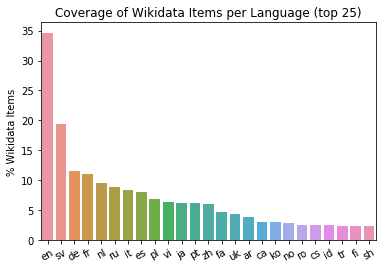

In [7]:
from collections import OrderedDict
topLangs = OrderedDict(sorted(coveragePerLang.items(),  key=lambda x: x[1], reverse=True)[0:25])
ax1 = plt.axes()
sns.barplot(list(topLangs.keys()),list(topLangs.values()))
ax1.set_xticklabels(rotation=30,labels=topLangs.keys())
ax1.set_title('Coverage of Wikidata Items per Language (top 25)')
ax1.set_ylabel('% Wikidata Items')
plt.savefig('CoveragePerLang.png')
plt.show()


[Text(0,0,'rn'),
 Text(0,0,'ee'),
 Text(0,0,'ch'),
 Text(0,0,'ak'),
 Text(0,0,'cr'),
 Text(0,0,'ff'),
 Text(0,0,'ady'),
 Text(0,0,'ve'),
 Text(0,0,'dz'),
 Text(0,0,'sg'),
 Text(0,0,'ti'),
 Text(0,0,'ks'),
 Text(0,0,'atj'),
 Text(0,0,'mo'),
 Text(0,0,'din'),
 Text(0,0,'ng'),
 Text(0,0,'aa'),
 Text(0,0,'cho'),
 Text(0,0,'mh'),
 Text(0,0,'ii'),
 Text(0,0,'kj'),
 Text(0,0,'hz'),
 Text(0,0,'kr'),
 Text(0,0,'mus')]

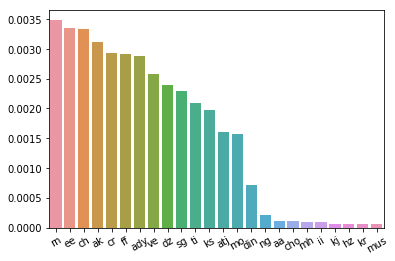

In [8]:
from collections import OrderedDict
bLang = OrderedDict(sorted(coveragePerLang.items(),  key=lambda x: x[1], reverse=True)[-25:-1])
ax2 = plt.axes()
sns.barplot(list(bLang.keys()),list(bLang.values()))
ax2.set_xticklabels(rotation=30,labels=bLang.keys())

### Unique Content

In [10]:
uniquePerLang = {}
for i,rows in il.groupby('lang'):
    nonLang = set(il[il.lang != i]['wikidata'])
    clang = set(rows['wikidata'])
    r =  100*len(clang - nonLang)/len(clang)
    uniquePerLang[i] = r
    print(i,r)

aa 0.0
ab 4.56915818226968
ace 14.678794769755543
ady 20.87378640776699
af 10.611230175739392
ak 3.4482758620689653
als 7.347936696732415
am 46.16399622997172
an 10.788546081032912
ang 8.421254555917898
ar 26.210477951257918
arc 11.384111384111383
arz 20.923562311773985
as 13.823629553966633
ast 5.46583021890016
atj 27.03488372093023
av 8.24742268041237
ay 4.243681629573746
az 24.207311596155574
azb 13.84747530523345
ba 7.027498908773461
bar 4.305010115434964
bat_smg 21.217362195938406
bcl 15.467894474863115
be 14.1113126991434
be_x_old 5.978102984966228
bg 16.056687755075085
bh 3.362299085590958
bi 5.591677503250975
bjn 11.872909698996656
bm 12.531328320802006
bn 14.50533644626032
bo 64.03059007560616
bpy 15.499938049807954
br 10.414210948182376
bs 12.368377570486533
bug 0.7663090557739721
bxr 3.8035339922132376
ca 21.51748382443117
cbk_zam 5.84045584045584
cdo 14.827682045580879
ce 41.082511231531655
ch 6.013986013986014
cho 0.0
chr 7.596785975164353
chy 6.7467652495378925
ckb 4.0644

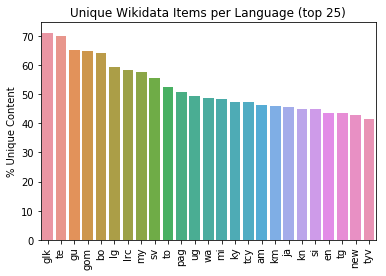

In [11]:
from collections import OrderedDict
unique = OrderedDict(sorted(uniquePerLang.items(),  key=lambda x: x[1], reverse=True)[0:25])
ax1 = plt.axes()
sns.barplot(list(unique.keys()),list(unique.values()))
ax1.set_xticklabels(rotation=90,labels=unique.keys())
ax1.set_title('Unique Wikidata Items per Language (top 25)')
ax1.set_ylabel('% Unique Content')
plt.savefig('UniquePerLang.png')
plt.show()

### Uniqueness vs Coverage

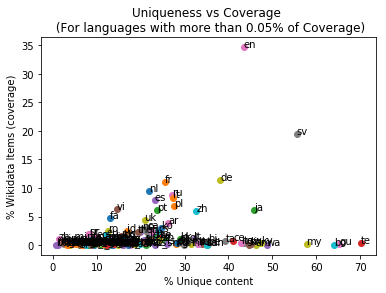

In [12]:
ax3 = plt.axes()
for k,v in uniquePerLang.items():
    if (coveragePerLang[k] >0.05):
        plt.annotate(k,(v,coveragePerLang[k]))
        plt.plot(v,coveragePerLang[k],'o')
plt.xlabel('% Unique content')
plt.ylabel('% Wikidata Items (coverage)')
plt.title('Uniqueness vs Coverage \n (For languages with more than 0.05% of Coverage)')
plt.savefig('UniquenessvsCoverageTop.png')
#plt.plot(x,y,'o')

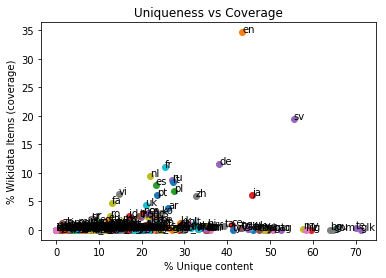

In [13]:
ax3 = plt.axes()
for k,v in uniquePerLang.items():
    #if (coveragePerLang[k] >0.05):
        plt.annotate(k,(v,coveragePerLang[k]))
        plt.plot(v,coveragePerLang[k],'o')
plt.xlabel('% Unique content')
plt.ylabel('% Wikidata Items (coverage)')
plt.title('Uniqueness vs Coverage')
plt.savefig('UniquenessvsCoverage.png')
#plt.plot(x,y,'o')

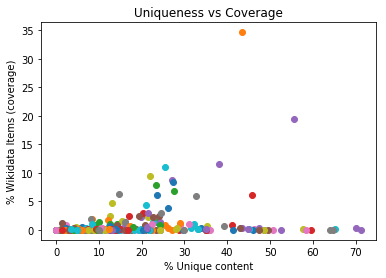

In [14]:
ax3 = plt.axes()
for k,v in uniquePerLang.items():
    #if (coveragePerLang[k] >0.05):
        #plt.annotate(k,(v,coveragePerLang[k]))
        plt.plot(v,coveragePerLang[k],'o')
plt.xlabel('% Unique content')
plt.ylabel('% Wikidata Items (coverage)')
plt.title('Uniqueness vs Coverage')
plt.savefig('UniquenessvsCoverageNoLabel.png')
#plt.plot(x,y,'o')

Text(0,0.5,'% Wikidata Items (coverage)')

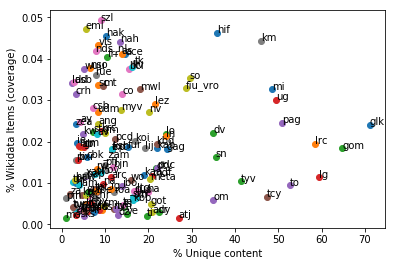

In [15]:
ax3 = plt.axes()
for k,v in uniquePerLang.items():
    if (coveragePerLang[k] <0.05) and (coveragePerLang[k] > 0.001) :
        plt.annotate(k,(v,coveragePerLang[k]))
        plt.plot(v,coveragePerLang[k],'o')
plt.xlabel('% Unique content')
plt.ylabel('% Wikidata Items (coverage)')
#plt.savefig('UniquenessvsCoveragebottom.png')
#plt.plot(x,y,'o')

In [16]:
print(uniquePerLang['ca'],coveragePerLang['ca'])
print(uniquePerLang['pt'],coveragePerLang['pt'])
print(uniquePerLang['en'],coveragePerLang['en'])
print(uniquePerLang['fr'],coveragePerLang['fr'])

21.51748382443117 3.0235938364784043
23.666936756821688 6.103776116930583
43.528676978004206 34.64293915436961
25.44855641094067 11.060194328555486


### Coverage from/to other languages to English

In [17]:
enQ= set(il[il.lang=='en'].wikidata)
ilTopLangs = il[il.lang.isin(topLangs.keys())]


In [18]:
enToOther = {}
otherToEn = {}
for i,rows in ilTopLangs.groupby('lang'):
    if i != 'en':
        Qother = set(rows['wikidata'])
        enToOther[i] = 100*len(set(rows['wikidata']) & set(enQ))/len(enQ)
        otherToEn[i] = 100*len( Qother & set(enQ))/len(Qother)
otherToEn = OrderedDict(sorted(otherToEn.items(),  key=lambda x: x[1], reverse=True)[0:25])
enToOther = OrderedDict(sorted(enToOther.items(),  key=lambda x: x[1], reverse=True)[0:25])



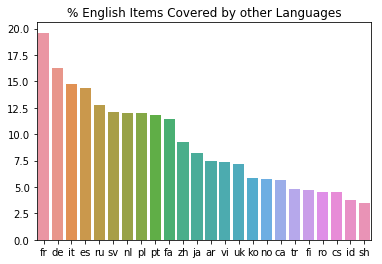

In [19]:
ax1 = plt.axes()
sns.barplot(list(enToOther.keys()),list(enToOther.values()))
ax1.set_title('% English Items Covered by other Languages')
plt.savefig('LangXtoEnglish.png')
plt.show()


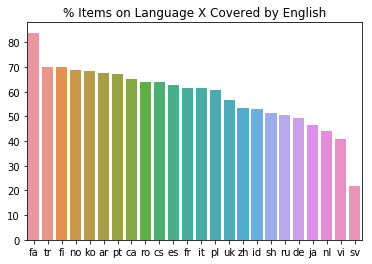

In [25]:
ax = plt.axes()
sns.barplot(list(otherToEn.keys()),list(otherToEn.values()))
ax.set_title('% Items on Language X Covered by English')
plt.savefig('EnglishtoLang.png')


### Coverage from/to other languages to Portuguese

In [21]:
ptQ= set(il[il.lang=='pt'].wikidata)
ptToOther = {}
otherToPt = {}
for i,rows in ilTopLangs.groupby('lang'):
    if i != 'pt':
        Qother = set(rows['wikidata'])
        ptToOther[i] = 100*len(set(rows['wikidata']) & set(ptQ))/len(ptQ)
        otherToPt[i] = 100*len( Qother & set(ptQ))/len(Qother)
otherToPt = OrderedDict(sorted(otherToPt.items(),  key=lambda x: x[1], reverse=True)[0:25])
ptToOther = OrderedDict(sorted(ptToOther.items(),  key=lambda x: x[1], reverse=True)[0:25])


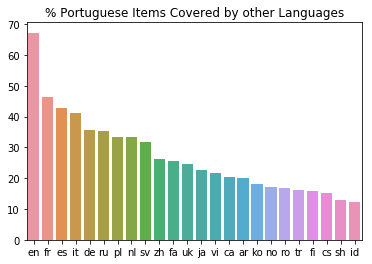

In [22]:
ax1 = plt.axes()
sns.barplot(list(ptToOther.keys()),list(ptToOther.values()))
ax1.set_title('% Portuguese Items Covered by other Languages')
plt.savefig('LangXtoPortuguese.png')
plt.show()


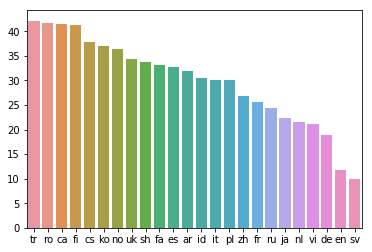

In [23]:
x1 = plt.axes()
sns.barplot(list(otherToPt.keys()),list(otherToPt.values()))
ax1.set_title('Coverage from Portuguese to lang X')
plt.show()

### Coverage Catalan

In [24]:
caQ= set(il[il.lang=='ca'].wikidata)
caToOther = {}
otherToca = {}
for i,rows in ilTopLangs.groupby('lang'):
    if i != 'ca':
        Qother = set(rows['wikidata'])
        caToOther[i] = 100*len(set(rows['wikidata']) & set(caQ))/len(caQ)
        otherToca[i] = 100*len( Qother & set(caQ))/len(Qother)
otherToca = OrderedDict(sorted(otherToca.items(),  key=lambda x: x[1], reverse=True)[0:25])
caToOther = OrderedDict(sorted(caToOther.items(),  key=lambda x: x[1], reverse=True)[0:25])


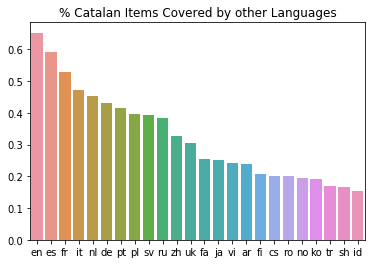

In [138]:
ax1 = plt.axes()
sns.barplot(list(caToOther.keys()),list(caToOther.values()))
ax1.set_title('% Catalan Items Covered by other Languages')
plt.savefig('LangXtoCatalan.png')
plt.show()
